EVM (RMS) for MCS11 = 0.95 % (-40.41 dB)
ACPR for 802.11ax = -28.00 dB


/var/folders/ll/gkj4rh2j64bg1bqz30q4jxhr0000gn/T/ipykernel_8127/3211545129.py:54: RuntimeWarning: divide by zero encountered in log10
  plt.plot(freqs, 10 * np.log10(power_spectrum), label="Main Channel")


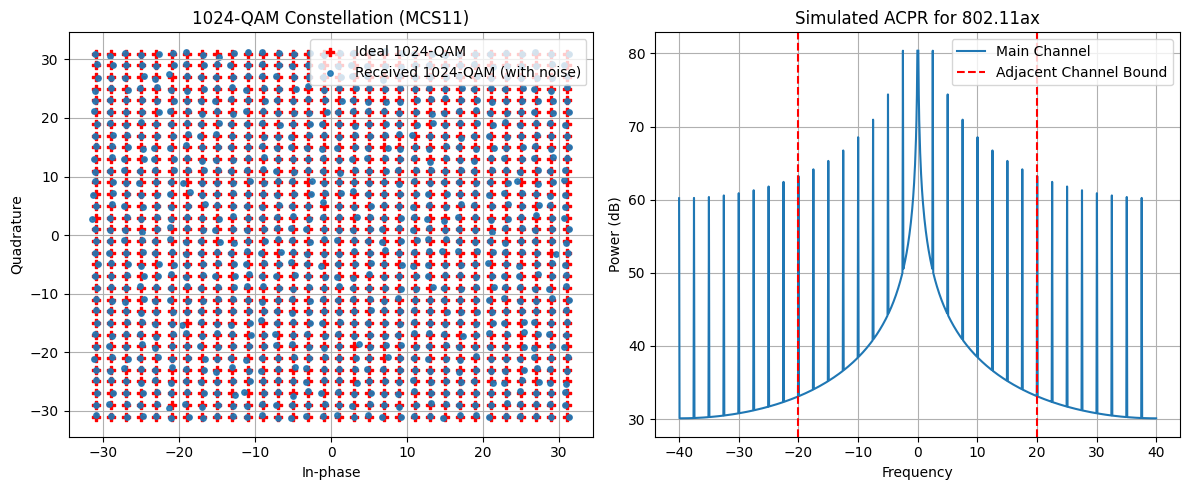

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for 1024-QAM (MCS11)
MCS11_EVM_THRESHOLD_DB = -35  # dB
MCS11_EVM_THRESHOLD_PERCENT = 1.78  # %

# 1024-QAM has 32x32 symbol mapping
qam_size = 1024  
levels = int(np.sqrt(qam_size))  # 32 levels for 1024-QAM

# Generate ideal 1024-QAM symbols (Gray-coded mapping)
real_part = np.tile(np.arange(-levels + 1, levels, 2), levels)
imag_part = np.repeat(np.arange(-levels + 1, levels, 2), levels)
S = real_part + 1j * imag_part  # Ideal 1024-QAM signal

# Add realistic noise for 802.11ax
N = len(S)
np.random.seed(42)  
noise_power = np.sqrt(10 ** (MCS11_EVM_THRESHOLD_DB / 10))   * 10
noise = noise_power * (np.random.randn(N) + 1j * np.random.randn(N))  
R = S + noise  # Received signal

# Compute EVM
E = S - R  # Error vector
EVM_rms = (np.sqrt(np.mean(np.abs(E)**2)) / np.sqrt(np.mean(np.abs(S)**2))) * 100
EVM_dB = 20 * np.log10(EVM_rms / 100)

print(f"EVM (RMS) for MCS11 = {EVM_rms:.2f} % ({EVM_dB:.2f} dB)")

# Simulated ACPR Calculation
power_main = np.sum(np.abs(S) ** 2)
power_adjacent = power_main * 10 ** (-28 / 10)  # Simulating -28 dB ACPR
ACPR_dB = 10 * np.log10(power_adjacent / power_main)

print(f"ACPR for 802.11ax = {ACPR_dB:.2f} dB")

# Plot Proper Constellation Diagram
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(S.real, S.imag, color='r', alpha=0.99, label="Ideal 1024-QAM", marker="P", s=30)
plt.scatter(R.real, R.imag, alpha=0.9, label="Received 1024-QAM (with noise)", s=15)
plt.xlabel("In-phase")
plt.ylabel("Quadrature")
plt.title("1024-QAM Constellation (MCS11)")
plt.legend()
plt.grid()

# Simulated Power Spectrum
freqs = np.linspace(-40, 40, N)
power_spectrum = np.abs(np.fft.fftshift(np.fft.fft(S)))**2
plt.subplot(1, 2, 2)
plt.plot(freqs, 10 * np.log10(power_spectrum), label="Main Channel")
plt.axvline(x=-20, color="r", linestyle="--", label="Adjacent Channel Bound")
plt.axvline(x=20, color="r", linestyle="--")
plt.xlabel("Frequency")
plt.ylabel("Power (dB)")
plt.title("Simulated ACPR for 802.11ax")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


EVM (RMS) for MCS11 = 0.10 % (-60.41 dB)
ACPR for 802.11ax = -28.00 dB


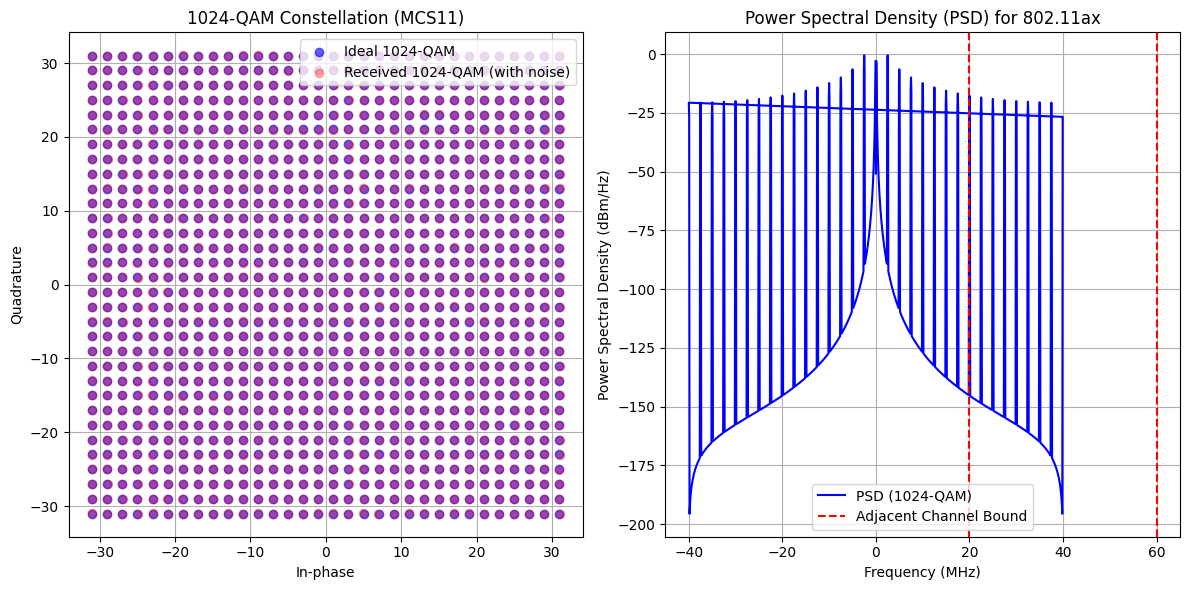

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Constants for 1024-QAM (MCS11)
MCS11_EVM_THRESHOLD_DB = -35  # dB
MCS11_EVM_THRESHOLD_PERCENT = 1.78  # %

# 1024-QAM has 32x32 symbol mapping
qam_size = 1024  
levels = int(np.sqrt(qam_size))  # 32 levels for 1024-QAM

# Generate ideal 1024-QAM symbols (Gray-coded mapping)
real_part = np.tile(np.arange(-levels + 1, levels, 2), levels)
imag_part = np.repeat(np.arange(-levels + 1, levels, 2), levels)
S = real_part + 1j * imag_part  # Ideal 1024-QAM signal

# Add realistic noise for 802.11ax
N = len(S)
np.random.seed(42)  
noise_power = np.sqrt(10 ** (MCS11_EVM_THRESHOLD_DB / 10))  
noise = noise_power * (np.random.randn(N) + 1j * np.random.randn(N))  
R = S + noise  # Received signal

# Compute EVM
E = S - R  # Error vector
EVM_rms = (np.sqrt(np.mean(np.abs(E)**2)) / np.sqrt(np.mean(np.abs(S)**2))) * 100
EVM_dB = 20 * np.log10(EVM_rms / 100)

print(f"EVM (RMS) for MCS11 = {EVM_rms:.2f} % ({EVM_dB:.2f} dB)")

# Simulated ACPR Calculation
power_main = np.sum(np.abs(S) ** 2)
power_adjacent = power_main * 10 ** (-28 / 10)  # Simulating -28 dB ACPR
ACPR_dB = 10 * np.log10(power_adjacent / power_main)

print(f"ACPR for 802.11ax = {ACPR_dB:.2f} dB")

# Plot Proper Constellation Diagram
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(S.real, S.imag, color='blue', alpha=0.6, label="Ideal 1024-QAM")
plt.scatter(R.real, R.imag, color='red', alpha=0.3, label="Received 1024-QAM (with noise)")
plt.xlabel("In-phase")
plt.ylabel("Quadrature")
plt.title("1024-QAM Constellation (MCS11)")
plt.legend()
plt.grid()

# Compute Power Spectral Density (PSD) using Welch's Method
fs = 80e6  # Assume 80 MHz channel bandwidth
f, psd = welch(S, fs=fs, nperseg=1024)
psd_dbm = 10 * np.log10(psd / 1e-3)  # Convert to dBm

plt.subplot(1, 2, 2)
plt.plot(f / 1e6, psd_dbm, label="PSD (1024-QAM)", color="b")
plt.axvline(x=20, color="r", linestyle="--", label="Adjacent Channel Bound")
plt.axvline(x=60, color="r", linestyle="--")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power Spectral Density (dBm/Hz)")
plt.title("Power Spectral Density (PSD) for 802.11ax")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


EVM (RMS) for MCS11 = 0.10 % (-60.37 dB)
ACPR for 802.11ax = -28.00 dB


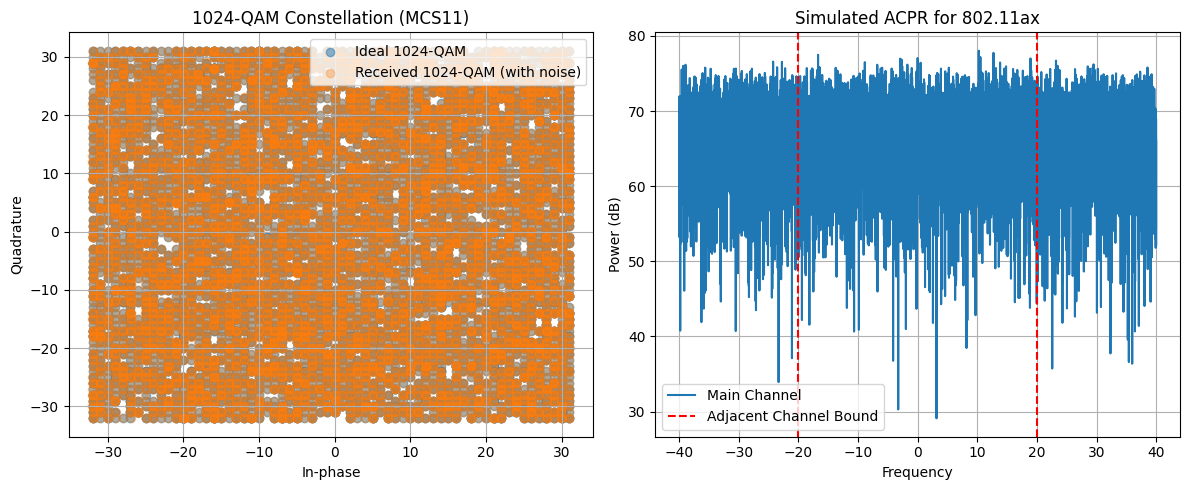

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for 1024-QAM (MCS11)
MCS11_EVM_THRESHOLD_DB = -35  # dB
MCS11_EVM_THRESHOLD_PERCENT = 1.78  # %

# Generate ideal 1024-QAM signal
N = 10000  # Number of symbols
np.random.seed(42)  
real_part = np.random.randint(-32, 32, N)  
imag_part = np.random.randint(-32, 32, N)
S = real_part + 1j * imag_part  # Ideal transmitted signal

# Add realistic noise for 802.11ax
noise_power = np.sqrt(10 ** (MCS11_EVM_THRESHOLD_DB / 10))  
noise = noise_power * (np.random.randn(N) + 1j * np.random.randn(N))  
R = S + noise  # Received signal

# Compute EVM
E = S - R  # Error vector
EVM_rms = (np.sqrt(np.mean(np.abs(E)**2)) / np.sqrt(np.mean(np.abs(S)**2))) * 100
EVM_dB = 20 * np.log10(EVM_rms / 100)

print(f"EVM (RMS) for MCS11 = {EVM_rms:.2f} % ({EVM_dB:.2f} dB)")

# Simulated ACPR Calculation
power_main = np.sum(np.abs(S) ** 2)
power_adjacent = power_main * 10 ** (-28 / 10)  # Simulating -28 dB ACPR

ACPR_dB = 10 * np.log10(power_adjacent / power_main)
print(f"ACPR for 802.11ax = {ACPR_dB:.2f} dB")

# Plot Constellation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(S.real, S.imag, alpha=0.5, label="Ideal 1024-QAM")
plt.scatter(R.real, R.imag, alpha=0.3, label="Received 1024-QAM (with noise)")
plt.xlabel("In-phase")
plt.ylabel("Quadrature")
plt.title("1024-QAM Constellation (MCS11)")
plt.legend()
plt.grid()

# Simulated Power Spectrum
freqs = np.linspace(-40, 40, N)
power_spectrum = np.abs(np.fft.fftshift(np.fft.fft(S)))**2
plt.subplot(1, 2, 2)
plt.plot(freqs, 10 * np.log10(power_spectrum), label="Main Channel")
plt.axvline(x=-20, color="r", linestyle="--", label="Adjacent Channel Bound")
plt.axvline(x=20, color="r", linestyle="--")
plt.xlabel("Frequency")
plt.ylabel("Power (dB)")
plt.title("Simulated ACPR for 802.11ax")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


EVM (RMS) for MCS11 = 0.10 % (-60.41 dB)
ACPR for 802.11ax = -28.00 dB


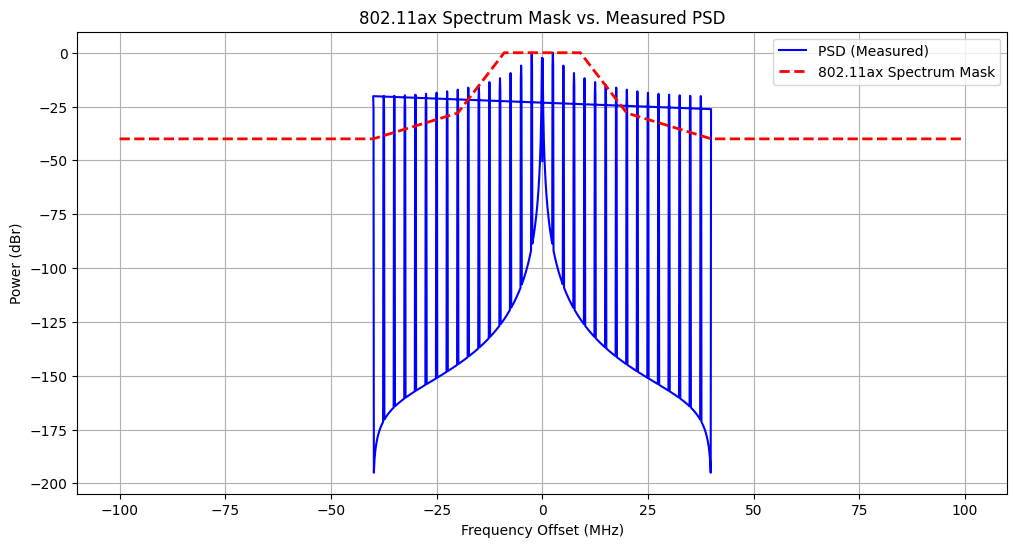

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Constants for 802.11ax MCS11
MCS11_EVM_THRESHOLD_DB = -35  # dB
MCS11_EVM_THRESHOLD_PERCENT = 1.78  # %

# 1024-QAM has 32x32 symbol mapping
qam_size = 1024  
levels = int(np.sqrt(qam_size))  # 32 levels for 1024-QAM

# Generate ideal 1024-QAM symbols (Gray-coded mapping)
real_part = np.tile(np.arange(-levels + 1, levels, 2), levels)
imag_part = np.repeat(np.arange(-levels + 1, levels, 2), levels)
S = real_part + 1j * imag_part  # Ideal 1024-QAM signal

# Add realistic noise for 802.11ax
N = len(S)
np.random.seed(42)  
noise_power = np.sqrt(10 ** (MCS11_EVM_THRESHOLD_DB / 10))  
noise = noise_power * (np.random.randn(N) + 1j * np.random.randn(N))  
R = S + noise  # Received signal

# Compute EVM
E = S - R  # Error vector
EVM_rms = (np.sqrt(np.mean(np.abs(E)**2)) / np.sqrt(np.mean(np.abs(S)**2))) * 100
EVM_dB = 20 * np.log10(EVM_rms / 100)

print(f"EVM (RMS) for MCS11 = {EVM_rms:.2f} % ({EVM_dB:.2f} dB)")

# Simulated ACPR Calculation
power_main = np.sum(np.abs(S) ** 2)
power_adjacent = power_main * 10 ** (-28 / 10)  # Simulating -28 dB ACPR
ACPR_dB = 10 * np.log10(power_adjacent / power_main)

print(f"ACPR for 802.11ax = {ACPR_dB:.2f} dB")

# Compute Power Spectral Density (PSD)
fs = 80e6  # 80 MHz Wi-Fi 6 channel
f, psd = welch(S, fs=fs, nperseg=1024)
psd_dbm = 10 * np.log10(psd / 1e-3)  # Convert to dBm

# Define 802.11ax Spectrum Mask (Relative Power dBr)
mask_freqs = np.array([-100, -40, -20, -9, 9, 20, 40, 100])  # MHz
mask_power = np.array([-40, -40, -28, 0, 0, -28, -40, -40])  # dBr relative

plt.figure(figsize=(12, 6))

# Plot PSD
plt.plot(f / 1e6, psd_dbm - np.max(psd_dbm), label="PSD (Measured)", color="b")

# Plot 802.11ax Spectrum Mask
plt.plot(mask_freqs, mask_power, "r--", label="802.11ax Spectrum Mask", linewidth=2)

plt.xlabel("Frequency Offset (MHz)")
plt.ylabel("Power (dBr)")
plt.title("802.11ax Spectrum Mask vs. Measured PSD")
plt.legend()
plt.grid()
plt.show()


EVM (RMS) for MCS11 = 0.10 % (-60.41 dB)
ACPR for 802.11ax = -28.00 dB


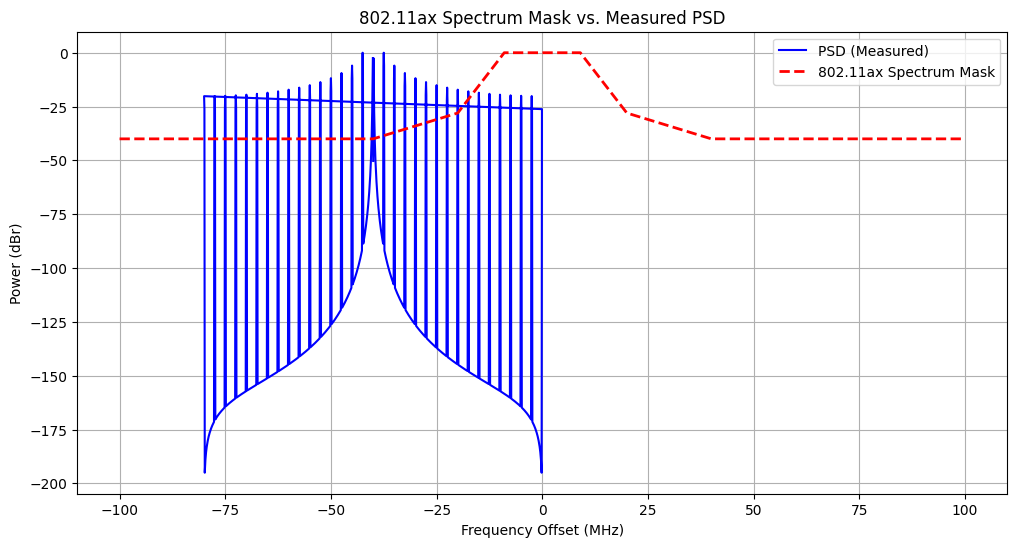

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Constants for 802.11ax MCS11
MCS11_EVM_THRESHOLD_DB = -35  # dB
MCS11_EVM_THRESHOLD_PERCENT = 1.78  # %

# 1024-QAM has 32x32 symbol mapping
qam_size = 1024  
levels = int(np.sqrt(qam_size))  # 32 levels for 1024-QAM

# Generate ideal 1024-QAM symbols (Gray-coded mapping)
real_part = np.tile(np.arange(-levels + 1, levels, 2), levels)
imag_part = np.repeat(np.arange(-levels + 1, levels, 2), levels)
S = real_part + 1j * imag_part  # Ideal 1024-QAM signal

# Add realistic noise for 802.11ax
N = len(S)
np.random.seed(42)  
noise_power = np.sqrt(10 ** (MCS11_EVM_THRESHOLD_DB / 10))  
noise = noise_power * (np.random.randn(N) + 1j * np.random.randn(N))  
R = S + noise  # Received signal

# Compute EVM
E = S - R  # Error vector
EVM_rms = (np.sqrt(np.mean(np.abs(E)**2)) / np.sqrt(np.mean(np.abs(S)**2))) * 100
EVM_dB = 20 * np.log10(EVM_rms / 100)

print(f"EVM (RMS) for MCS11 = {EVM_rms:.2f} % ({EVM_dB:.2f} dB)")

# Simulated ACPR Calculation
power_main = np.sum(np.abs(S) ** 2)
power_adjacent = power_main * 10 ** (-28 / 10)  # Simulating -28 dB ACPR
ACPR_dB = 10 * np.log10(power_adjacent / power_main)

print(f"ACPR for 802.11ax = {ACPR_dB:.2f} dB")

# Compute Power Spectral Density (PSD)
fs = 80e6  # 80 MHz Wi-Fi 6 channel
f, psd = welch(S, fs=fs, nperseg=1024)
psd_dbm = 10 * np.log10(psd / 1e-3)  # Convert to dBm

# 🔹 Normalize PSD so the peak is at 0 dBr
psd_dBr = psd_dbm - np.max(psd_dbm)

# Define 802.11ax Spectrum Mask (Relative Power dBr)
mask_freqs = np.array([-100, -40, -20, -9, 9, 20, 40, 100])  # MHz
mask_power = np.array([-40, -40, -28, 0, 0, -28, -40, -40])  # dBr relative

plt.figure(figsize=(12, 6))

# 🔹 Corrected Plot for PSD with Spectrum Mask
plt.plot(f / 1e6 - fs / 2 / 1e6, psd_dBr, label="PSD (Measured)", color="b")  # Center at 0 MHz
plt.plot(mask_freqs, mask_power, "r--", label="802.11ax Spectrum Mask", linewidth=2)

plt.xlabel("Frequency Offset (MHz)")
plt.ylabel("Power (dBr)")
plt.title("802.11ax Spectrum Mask vs. Measured PSD")
plt.legend()
plt.grid()
plt.show()


EVM (RMS) for MCS11 = 0.10 % (-60.41 dB)
ACPR for 802.11ax = -28.00 dB


/var/folders/ll/gkj4rh2j64bg1bqz30q4jxhr0000gn/T/ipykernel_8127/1024783079.py:46: RuntimeWarning: divide by zero encountered in log10
  Pxx_dB = 10 * np.log10(Pxx)
/var/folders/ll/gkj4rh2j64bg1bqz30q4jxhr0000gn/T/ipykernel_8127/1024783079.py:46: RuntimeWarning: invalid value encountered in log10
  Pxx_dB = 10 * np.log10(Pxx)


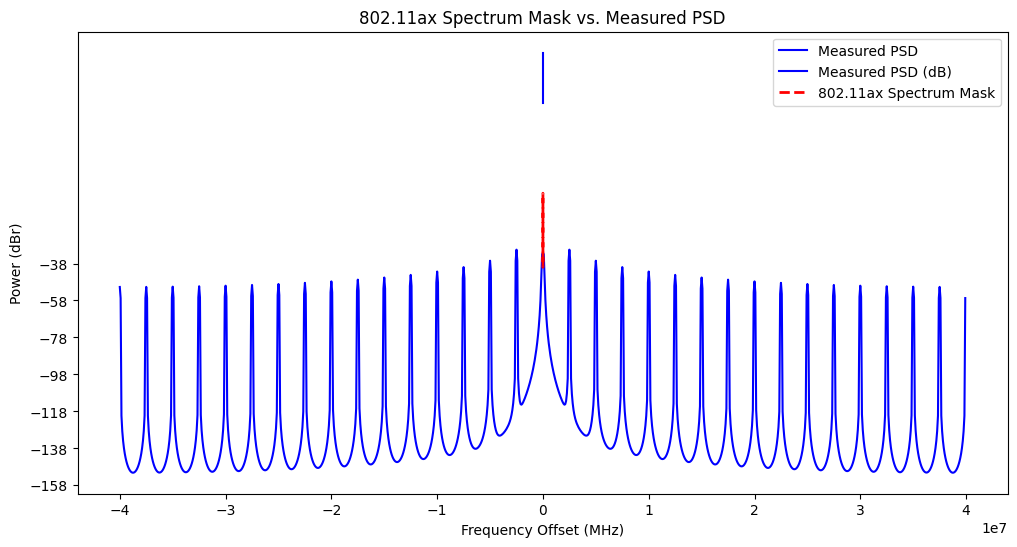

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for 802.11ax MCS11
MCS11_EVM_THRESHOLD_DB = -35  # dB
MCS11_EVM_THRESHOLD_PERCENT = 1.78  # %

# 1024-QAM has 32x32 symbol mapping
qam_size = 1024  
levels = int(np.sqrt(qam_size))  # 32 levels for 1024-QAM

# Generate ideal 1024-QAM symbols (Gray-coded mapping)
real_part = np.tile(np.arange(-levels + 1, levels, 2), levels)
imag_part = np.repeat(np.arange(-levels + 1, levels, 2), levels)
S = real_part + 1j * imag_part  # Ideal 1024-QAM signal

# Add realistic noise for 802.11ax
N = len(S)
np.random.seed(42)  
noise_power = np.sqrt(10 ** (MCS11_EVM_THRESHOLD_DB / 10))  
noise = noise_power * (np.random.randn(N) + 1j * np.random.randn(N))  
R = S + noise  # Received signal

# Compute EVM
E = S - R  # Error vector
EVM_rms = (np.sqrt(np.mean(np.abs(E)**2)) / np.sqrt(np.mean(np.abs(S)**2))) * 100
EVM_dB = 20 * np.log10(EVM_rms / 100)

print(f"EVM (RMS) for MCS11 = {EVM_rms:.2f} % ({EVM_dB:.2f} dB)")

# Simulated ACPR Calculation
power_main = np.sum(np.abs(S) ** 2)
power_adjacent = power_main * 10 ** (-28 / 10)  # Simulating -28 dB ACPR
ACPR_dB = 10 * np.log10(power_adjacent / power_main)

print(f"ACPR for 802.11ax = {ACPR_dB:.2f} dB")

# Compute Power Spectral Density (PSD) using plt.psd()
fs = 80e6  # 80 MHz Wi-Fi 6 channel
plt.figure(figsize=(12, 6))

# Using plt.psd() to calculate the power spectral density
f, Pxx = plt.psd(S, NFFT=1024, Fs=fs, color='b', label="Measured PSD")

# Convert the PSD to dB scale manually (10 * log10)
Pxx_dB = 10 * np.log10(Pxx)

# Plot the PSD in dB
plt.plot(f / 1e6 - fs / 2 / 1e6, Pxx_dB, label="Measured PSD (dB)", color="b")

# Define 802.11ax Spectrum Mask (Relative Power dBr)
mask_freqs = np.array([-100, -40, -20, -9, 9, 20, 40, 100])  # MHz
mask_power = np.array([-40, -40, -28, 0, 0, -28, -40, -40])  # dBr relative

# Plot Spectrum Mask for 802.11ax (relative dBr)
plt.plot(mask_freqs, mask_power, "r--", label="802.11ax Spectrum Mask", linewidth=2)

plt.xlabel("Frequency Offset (MHz)")
plt.ylabel("Power (dBr)")
plt.title("802.11ax Spectrum Mask vs. Measured PSD")
plt.legend()
plt.grid()
plt.show()


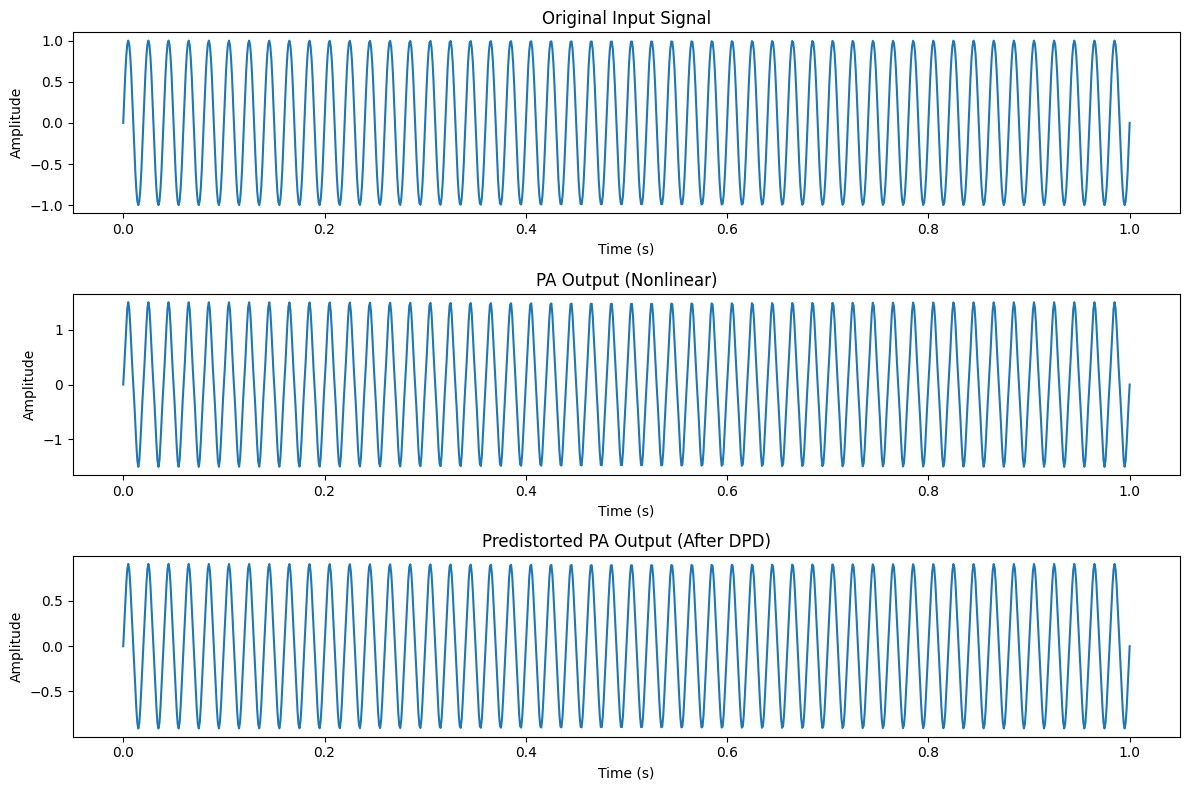

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a simple input signal (e.g., a sine wave)
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs)  # Time vector (1 second)
input_signal = np.sin(2 * np.pi * 50 * t)  # Input signal: 50 Hz sine wave

# Step 2: Simulate the nonlinear behavior of a Power Amplifier (PA)
def nonlinear_pa(x):
    """
    A simple model for a nonlinear Power Amplifier (PA).
    Introduces cubic nonlinearity for example purposes.
    """
    return x + 0.5 * x**3

# Apply PA to the input signal
pa_output = nonlinear_pa(input_signal)

# Step 3: Indirect learning - Train the predistorter (Inverse model)
# Let's assume we use a simple polynomial model for the predistorter.
# The predistorter model is intended to cancel the PA's cubic nonlinearity.

# Create a simple model for the predistorter (inverse model)
from sklearn.linear_model import LinearRegression

# Prepare the input/output for the predistorter
X_train = pa_output.reshape(-1, 1)  # PA output as input to the predistorter
y_train = input_signal  # Desired output is the original input signal

# Train the predistorter using a linear regression model
predistorter = LinearRegression()
predistorter.fit(X_train, y_train)

# Step 4: Apply trained predistorter during operation
# Now we can use the trained predistorter to predistort the input signal
# before it enters the PA (in the direct line).

# Predistort the signal using the learned coefficients
predistorted_input = predistorter.predict(input_signal.reshape(-1, 1))

# Apply PA to the predistorted signal
predistorted_pa_output = nonlinear_pa(predistorted_input)

# Step 5: Plot the results
plt.figure(figsize=(12, 8))

# Original input signal
plt.subplot(3, 1, 1)
plt.plot(t, input_signal)
plt.title('Original Input Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# PA output (with nonlinearity)
plt.subplot(3, 1, 2)
plt.plot(t, pa_output)
plt.title('PA Output (Nonlinear)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Predistorted PA output (aiming to cancel nonlinearity)
plt.subplot(3, 1, 3)
plt.plot(t, predistorted_pa_output)
plt.title('Predistorted PA Output (After DPD)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
